# Importing the libraries


In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


# Importing the dataset

In [2]:

df_train = pd.read_csv("NewCropTrainFinal.csv")

df_test = pd.read_csv("NewCropTestFinal.csv")

# Data Preprocessing And Data Wrangling

In [3]:
df_train.head(10)


,Area,Production,Rainfall,Season,Temperature,Crop,pH,Nitrogen(kg/ha),ElectricalConductivity(ds/m)
0,7800.0,3200.0,30.400333,Kharif,28.007000,Moong(Green Gram),6.5,497.0,4.1
1,39922.0,75572.0,111.901000,Kharif,27.232333,Maize,5.6,473.0,3.9
2,44656.0,49099.0,3.396500,Rabi,20.277000,Wheat,7.3,366.0,4.9
3,6540.0,3945.0,30.932500,Rabi,24.241500,Wheat,5.3,417.0,3.8
4,2911.0,2062.0,189.208333,Kharif,27.456333,Maize,6.3,267.0,3.5
5,7.0,2.0,21.609750,Rabi,23.570000,Moong(Green Gram),6.3,435.0,3.4
6,18.0,21.0,206.319750,Summer,28.760250,Groundnut,5.8,370.0,2.0
7,39157.0,1878596.0,186.938333,Kharif,27.940667,Sugarcane,5.1,312.0,5.3
8,10562.0,16812.0,81.593333,Kharif,26.181000,Jowar,7.1,334.0,3.8
9,179.0,2174.0,68.501750,Rabi,24.139750,Potato,6.8,365.0,2.9


In [4]:
df_test.head(10)

,Area,Production,Rainfall,Season,Temperature,Crop,Nitrogen(kg/ha),ElectricalConductivity(ds/m),pH
0,28625.0,1784483.0,143.636000,Kharif,28.299667,Sugarcane,328.0,1.5,5.4
1,138347.0,258707.0,8.579000,Rabi,20.535500,Wheat,224.0,1.8,6.5
2,610.0,3547.0,56.610000,Rabi,23.534750,Onion,318.0,4.6,6.0
3,200.0,300.0,223.255500,Summer,30.272250,Maize,229.0,3.2,6.7
4,33000.0,23100.0,127.565667,Kharif,26.343000,Moong(Green Gram),479.0,3.9,7.2
5,7700.0,3500.0,71.837000,Kharif,29.354333,Urad,368.0,3.0,7.5
6,7425.0,3438.0,159.932333,Kharif,28.107333,Arhar/Tur,279.0,3.7,5.4
7,4842.0,4019.0,132.896000,Kharif,28.846667,Arhar/Tur,358.0,3.9,5.2
8,842.0,1880.0,127.488000,Summer,26.284500,Maize,448.0,4.0,6.9
9,4500.0,700.0,139.045333,Kharif,26.061000,Sesamum,397.0,1.3,6.6


In [5]:
import seaborn as sns

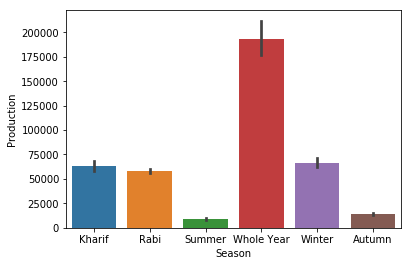

In [6]:
sns.barplot(x=df_train['Season'],y=df_train['Production'],data=df_train)

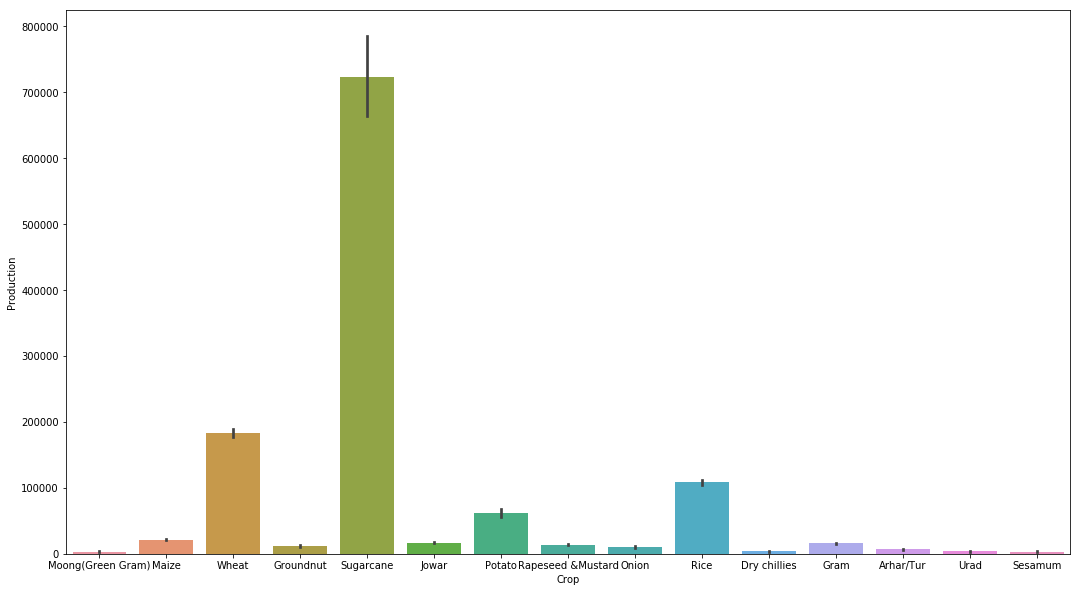

In [9]:
fig_dims = (18,10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x=df_train['Crop'],y=df_train['Production'],data=df_train,ax=ax)

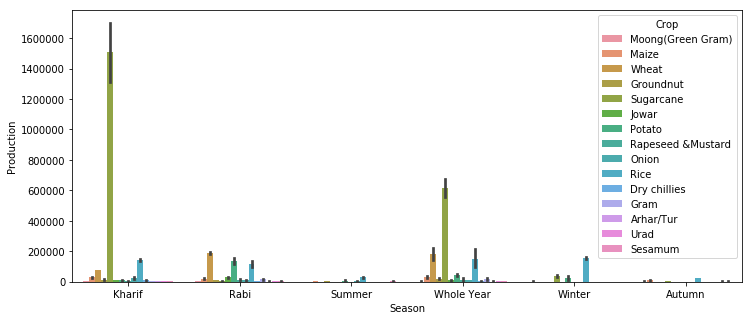

In [8]:
fig_dims = (12,5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x=df_train['Season'],y=df_train['Production'],data=df_train,ax=ax,hue='Crop',)

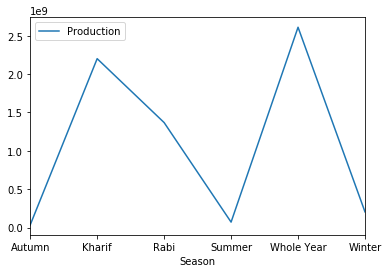

In [10]:

df_train.groupby("Season")[["Production"]].sum().plot()

In [11]:
#checking the shape
df_train.shape

(85225, 9)

In [12]:
df_train["Production"].skew()

21.255070910532442

In [13]:
df_train.skew()

Area                             5.092390
Production                      21.255071
Rainfall                         1.130601
Temperature                     -0.831871
pH                               0.002311
Nitrogen(kg/ha)                 -0.001419
ElectricalConductivity(ds/m)    -0.000270
dtype: float64

In [14]:
df_train.describe()


,Area,Production,Rainfall,Temperature,pH,Nitrogen(kg/ha),ElectricalConductivity(ds/m)
count,85225.000000,8.522500e+04,85225.000000,85225.000000,85225.000000,85225.000000,85225.000000
mean,16082.843264,7.613732e+04,114.042007,25.474624,6.248319,350.157207,3.399781
std,41257.777752,5.501601e+05,90.199928,3.465730,0.722351,86.445530,1.326858
min,0.580000,0.000000e+00,0.023250,-1.243750,5.000000,200.000000,1.100000
25%,166.000000,2.000000e+02,38.234250,23.132750,5.600000,275.000000,2.300000
50%,1200.000000,1.843000e+03,99.685333,26.457000,6.200000,350.000000,3.400000
75%,9383.000000,1.775100e+04,169.448667,28.116000,6.900000,425.000000,4.600000
max,814077.000000,2.832200e+07,830.300333,33.284000,7.500000,500.000000,5.700000


# As We Can see that our target Vriable is Highly skewed, so applying some transformation to remove the skewness

In [15]:
df_train['Production']=pd.Series(np.sqrt(df_train['Production']))


In [16]:
df_train["Production"].skew()

6.36295872006471

In [17]:
df_train.skew()

Area                            5.092390
Production                      6.362959
Rainfall                        1.130601
Temperature                    -0.831871
pH                              0.002311
Nitrogen(kg/ha)                -0.001419
ElectricalConductivity(ds/m)   -0.000270
dtype: float64

In [100]:
df_test.skew()

Area                            5.578947
Rainfall                        1.140426
Season                          0.753235
Temperature                    -0.825348
Crop                            0.007647
Nitrogen(kg/ha)                -0.007730
ElectricalConductivity(ds/m)   -0.005516
pH                             -0.014586
dtype: float64

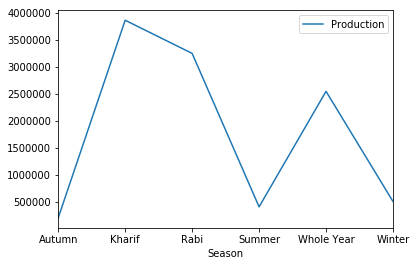

In [24]:
#Checking prodcution for each sesaon
df_train.groupby("Season")[["Production"]].sum().plot()

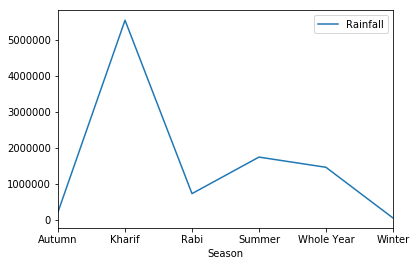

In [26]:
#Checking Rainfall for each sesaon
df_train.groupby("Season")[["Rainfall"]].sum().plot()

In [27]:
#checking if null value is present or not
df_train.isna().sum()

Area                            0
Production                      0
Rainfall                        0
Season                          0
Temperature                     0
Crop                            0
pH                              0
Nitrogen(kg/ha)                 0
ElectricalConductivity(ds/m)    0
dtype: int64

In [28]:
df_test.isna().sum()

Area                            0
Production                      0
Rainfall                        0
Season                          0
Temperature                     0
Crop                            0
Nitrogen(kg/ha)                 0
ElectricalConductivity(ds/m)    0
pH                              0
dtype: int64

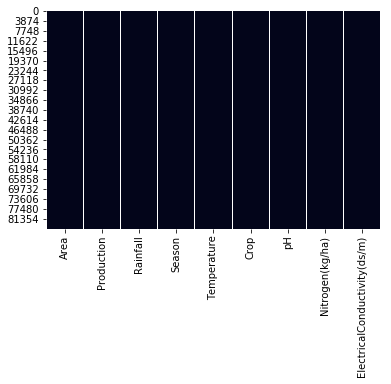

In [29]:
sns.heatmap(df_train.isnull(), cbar=False)
#as we can se no missing values in our dataset

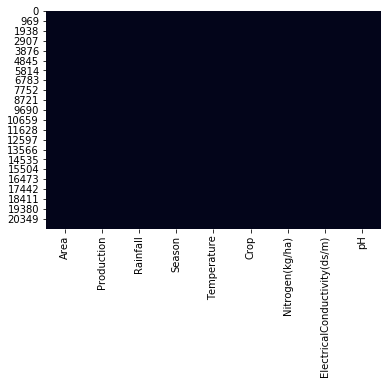

In [32]:
sns.heatmap(df_test.isnull(), cbar=False)

In [33]:
#checking the data types of columns
#We can see that we have two columns 
df_train.dtypes

Area                            float64
Production                      float64
Rainfall                        float64
Season                           object
Temperature                     float64
Crop                             object
pH                              float64
Nitrogen(kg/ha)                 float64
ElectricalConductivity(ds/m)    float64
dtype: object

# WE can see that we have two columns Season and Crop as Categorical Values

In [34]:
#Storing our target Variable
y_train = df_train['Production']
y_test = df_test['Production']
df_train = df_train.drop(['Production'], axis=1)
df_test = df_test.drop(['Production'], axis=1)

In [35]:
df_train.head(10)

,Area,Rainfall,Season,Temperature,Crop,pH,Nitrogen(kg/ha),ElectricalConductivity(ds/m)
0,7800.0,30.400333,Kharif,28.007000,Moong(Green Gram),6.5,497.0,4.1
1,39922.0,111.901000,Kharif,27.232333,Maize,5.6,473.0,3.9
2,44656.0,3.396500,Rabi,20.277000,Wheat,7.3,366.0,4.9
3,6540.0,30.932500,Rabi,24.241500,Wheat,5.3,417.0,3.8
4,2911.0,189.208333,Kharif,27.456333,Maize,6.3,267.0,3.5
5,7.0,21.609750,Rabi,23.570000,Moong(Green Gram),6.3,435.0,3.4
6,18.0,206.319750,Summer,28.760250,Groundnut,5.8,370.0,2.0
7,39157.0,186.938333,Kharif,27.940667,Sugarcane,5.1,312.0,5.3
8,10562.0,81.593333,Kharif,26.181000,Jowar,7.1,334.0,3.8
9,179.0,68.501750,Rabi,24.139750,Potato,6.8,365.0,2.9


In [36]:
df_train.columns

Index(['Area', 'Rainfall', 'Season', 'Temperature', 'Crop', 'pH',
       'Nitrogen(kg/ha)', 'ElectricalConductivity(ds/m)'],
      dtype='object')

In [37]:
cr = LabelEncoder()
se = LabelEncoder()
df_train['Season'] = se.fit_transform(df_train['Season'])
df_train['Crop'] = cr.fit_transform(df_train['Crop'])
df_test['Season'] = se.transform(df_test['Season'])
df_test['Crop'] = cr.transform(df_test['Crop'])


In [38]:
df_train.head()

,Area,Rainfall,Season,Temperature,Crop,pH,Nitrogen(kg/ha),ElectricalConductivity(ds/m)
0,7800.0,30.400333,1,28.007000,6,6.5,497.0,4.1
1,39922.0,111.901000,1,27.232333,5,5.6,473.0,3.9
2,44656.0,3.396500,2,20.277000,14,7.3,366.0,4.9
3,6540.0,30.932500,2,24.241500,14,5.3,417.0,3.8
4,2911.0,189.208333,1,27.456333,5,6.3,267.0,3.5


#      WE can see that we have only encoded the values using Labelencoder ,however categories are more than two

In [39]:
df_train["Season"].nunique()
#So We have 6 categories of Season

6

In [40]:
df_train["Crop"].nunique()

15

In [41]:

X_train = df_train.values

In [42]:
from sklearn.preprocessing import OneHotEncoder
one1=OneHotEncoder(categorical_features=[2])
X_train=one1.fit_transform(X_train).toarray()

/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [43]:
len(X_train[0])


13

# WE can See that We have now 13 columns it is because the 6 values of Season column are added it into it(8(previously)+5(new columns))

In [44]:
X_train[0]
#to not fall in dummy varibale trap
X_train=X_train[:,1:]
#I have removed one column

In [45]:
len(X_train[0])

12

In [46]:
X_test = df_test.values

In [47]:
from sklearn.preprocessing import OneHotEncoder
one2=OneHotEncoder(categorical_features=[2])
X_test=one2.fit_transform(X_test).toarray()

/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [48]:
X_test=X_test[:,1:]


In [49]:
len(X_test[0])

12

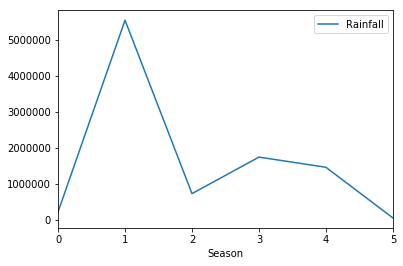

In [50]:
# Checking Rainfall for each sesaon
df_train.groupby("Season")[["Rainfall"]].sum().plot()

# Since the Values are not normally distibuted we have to noramlize the values

In [51]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
X_train=sc1.fit_transform(X_train)
X_test=sc1.transform(X_test)


# Applying Algorithms

In [52]:

from sklearn.ensemble import RandomForestRegressor
best_clf = RandomForestRegressor()


In [53]:
best_clf.fit(X_train, y_train)

/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


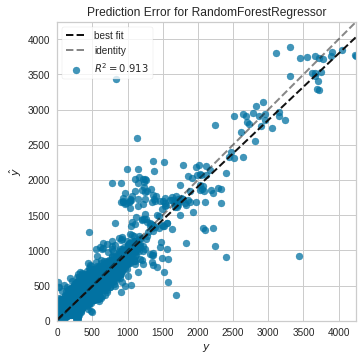

In [56]:
from yellowbrick.regressor import PredictionError
model=RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [57]:
mae_random_forest=mean_absolute_error(y_test,np.square(model.predict(X_test)))
print(mae_random_forest)

80955.7328563376


In [58]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(min_samples_split=5,min_samples_leaf=8)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [67]:
mae_decision_tree=mean_absolute_error(y_test,np.square(regressor.predict(X_test)))
print(mae_decision_tree)

78585.34373374887


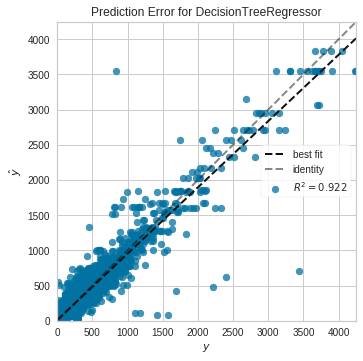

In [68]:

visualizer = PredictionError(regressor)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
grad=GradientBoostingRegressor()
grad.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

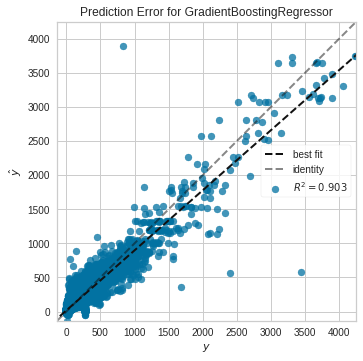

In [62]:
visualizer = PredictionError(grad)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [71]:
mae_gradient_regressor=mean_absolute_error(y_test,np.square(grad.predict(X_test)))
print(mae_gradient_regressor)

71591.36339425045


In [72]:
from sklearn.linear_model import LinearRegression
li=LinearRegression(normalize=True)
li.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [73]:
print(mean_absolute_error(y_test,np.square(li.predict(X_test))))


28316.48782201958


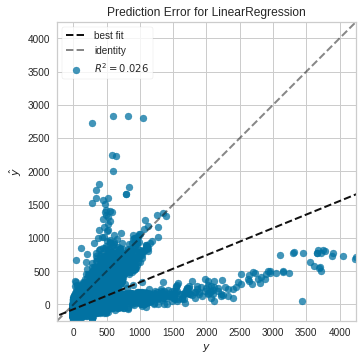

In [74]:
visualizer = PredictionError(li)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


In [75]:
from sklearn.linear_model import Lasso
Las=Lasso()
Las.fit(X_train,y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
mae_lasso_regression=mean_absolute_error(y_test,np.square(Las.predict(X_test)))
print(mae_lasso_regression)


42047.029641008754


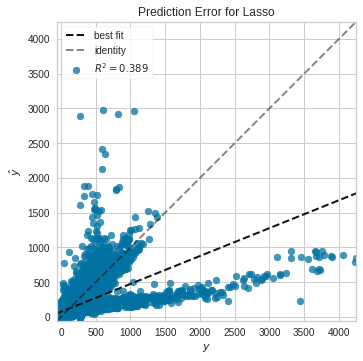

In [78]:
visualizer = PredictionError(Las)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


# Now Applying Hyperparameter Tuning 
# 1.Grid Search
# 2.Random Search

In [84]:
param_grid = { 'max_depth': [5,10],'min_samples_split':[4,8],'n_estimators':[100]}

In [ ]:
from sklearn.model_selection import GridSearchCV
search=GridSearchCV(grad,param_grid,cv=5)
search.fit(X_train,y_train)

In [88]:
random_parameters={'criterion':['mse','mae'],'min_samples_leaf':[2],
           'min_samples_split':[2,4], 'min_weight_fraction_leaf':[0.1,0.2]}



In [89]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(best_clf,random_parameters,cv=5)


# Applying Deep Learning

In [90]:
from keras import optimizers

In [91]:
sgd = optimizers.SGD(lr=0.1, clipnorm = 1, nesterov = True)
model = Sequential()
model.add(Dense(256, input_dim =12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_absolute_error', optimizer='nadam')

In [92]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
85225/85225 [==============================] - 13s 158us/step - loss: 59.2701
Epoch 2/10
85225/85225 [==============================] - 13s 151us/step - loss: 50.3853
Epoch 3/10
85225/85225 [==============================] - 11s 125us/step - loss: 48.8055
Epoch 4/10
85225/85225 [==============================] - 11s 126us/step - loss: 47.8577
Epoch 5/10
85225/85225 [==============================] - 11s 126us/step - loss: 47.2745
Epoch 6/10
85225/85225 [==============================] - 11s 125us/step - loss: 46.7172
Epoch 7/10
85225/85225 [==============================] - 11s 128us/step - loss: 46.3170
Epoch 8/10
85225/85225 [==============================] - 11s 127us/step - loss: 45.9249
Epoch 9/10
85225/85225 [==============================] - 11s 129us/step - loss: 45.5981
Epoch 10/10
85225/85225 [==============================] - 11s 126us/step - loss: 45.1759


In [94]:
ypredkeras = np.square(model.predict(X_test))
mae_deep_learn=mean_absolute_error(y_test, ypredkeras)
print(mae_random_forest)

80955.7328563376


In [99]:
y_test[0]

1335.8454251896062

In [ ]:
# best mean_abs_error by using nadam as optimizer and scaled data. (51K)
# ypredkeras = model.predict(x_testscaled)
# mean_absolute_error(y_test, ypredkeras)

# Using GridSearch to optimise randomforest:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestRegressor(n_estimators=70, max_features='sqrt', oob_score=True)
para_grid = {
    'n_estimators' : [200, 500, 1200], 
    'max_features' : ['sqrt', 'log2', 'auto']
}
cv_rfc = GridSearchCV(estimator = rfc, param_grid = para_grid, cv = 3)
cv_rfc.fit(x_train, y_train)

from sklearn.linear_model import LinearRegression
clf_linear = LinearRegression()
clf_linear.fit(x_train, y_train)
ypredlinear = clf_linear.predict(x_test)
print(mean_absolute_error(y_test, ypredlinear))
# on scaled data:
clf_linearscaled = LinearRegression()
clf_linearscaled.fit(x_trainscaled, y_train)
ypredlinearscaled = clf_linearscaled.predict(x_testscaled)
mean_absolute_error(y_test, ypredlinearscaled)

In [101]:
#KNN neighbor
from sklearn.neighbors import KNeighborsRegressor
clfKNN = KNeighborsRegressor(n_neighbors = 500, algorithm = 'ball_tree')
clfKNN.fit(X_train, y_train)
ypredknn = clfKNN.predict(X_test)
mae_KNN=mean_absolute_error(np.square(y_test), np.square(ypredknn))

In [102]:
print(mae_KNN)

79650.24389345224


# testing on diff neighbors:
x_ax = []
y_ax = []
for i in range(10, 500, 30):
    clfk = KNeighborsRegressor(n_neighbors = i, algorithm='ball_tree')
    clfk.fit(x_trainscaled, y_train)
    ypredk = clfk.predict(x_testscaled)
    mae = mean_absolute_error(y_test, ypredk)
    print(mae)
    x_ax.append(i)
    y_ax.append(mae)

plt.plot(x_ax,y_ax)
plt.xlabel('No Of Neighbors')
plt.ylabel('Mean Absolute Error')

df_test.head(10)

In [218]:
test =  pd.read_csv("Updated_UttarPradesh.csv")

In [219]:
test.head(15)
#we can see that the order of columns in the test dataframe are not in the same order
#as that of train dataframe

,District,Year,Season,Crop,Area,Rainfall,Temprature,pH,Nitrogen(kg/ha),ElectricalConductivity(ds/m)
0,balrampur,2014,Kharif,Urad,108030,0.000000e+00,0.000000e+00,7.0,267,2.9
1,balrampur,2014,Kharif,Urad,84190,1.482197e-323,1.482197e-323,7.3,320,5.6
2,balrampur,2014,Kharif,Sugarcane,43539,6.952763e-310,0.000000e+00,6.7,305,4.0
3,balrampur,2014,Rabi,Wheat,90246,2.152572e-314,6.952764e-310,5.7,279,2.1
4,balrampur,2014,Rabi,Wheat,18087,0.000000e+00,1.976263e-323,6.4,252,2.5
5,balrampur,2014,Rabi,Rapeseed &Mustard,9629,0.000000e+00,0.000000e+00,7.4,348,1.4
6,agra,2014,Kharif,Urad,10164,1.149530e+02,2.829433e+01,6.8,330,2.7
7,agra,2014,Kharif,Sugarcane,1935,1.149530e+02,2.829433e+01,5.9,461,3.7
8,agra,2014,Kharif,Sesamum,495,1.149530e+02,2.829433e+01,5.6,338,4.0
9,agra,2014,Rabi,Wheat,136036,1.828000e+00,1.974325e+01,6.6,283,5.6


In [220]:
li=list(df_train.columns)

In [221]:
test.columns

Index(['District', 'Year', 'Season', 'Crop', 'Area', 'Rainfall', 'Temprature',
       'pH', 'Nitrogen(kg/ha)', 'ElectricalConductivity(ds/m)'],
      dtype='object')

In [222]:
li

['Area',
 'Rainfall',
 'Season',
 'Temperature',
 'Crop',
 'pH',
 'Nitrogen(kg/ha)',
 'ElectricalConductivity(ds/m)']

In [223]:
test=test[['District','Year','Area',
 'Rainfall',
 'Season',
 'Temprature',
 'Crop',
 'pH',
 'Nitrogen(kg/ha)',
 'ElectricalConductivity(ds/m)']]

In [224]:
test.head()

,District,Year,Area,Rainfall,Season,Temprature,Crop,pH,Nitrogen(kg/ha),ElectricalConductivity(ds/m)
0,balrampur,2014,108030,0.000000e+00,Kharif,0.000000e+00,Urad,7.0,267,2.9
1,balrampur,2014,84190,1.482197e-323,Kharif,1.482197e-323,Urad,7.3,320,5.6
2,balrampur,2014,43539,6.952763e-310,Kharif,0.000000e+00,Sugarcane,6.7,305,4.0
3,balrampur,2014,90246,2.152572e-314,Rabi,6.952764e-310,Wheat,5.7,279,2.1
4,balrampur,2014,18087,0.000000e+00,Rabi,1.976263e-323,Wheat,6.4,252,2.5


In [225]:
test['Season'] = se.fit_transform(test['Season'])
test['Crop'] = cr.fit_transform(test['Crop'])


In [226]:
test.head()

,District,Year,Area,Rainfall,Season,Temprature,Crop,pH,Nitrogen(kg/ha),ElectricalConductivity(ds/m)
0,balrampur,2014,108030,0.000000e+00,0,0.000000e+00,5,7.0,267,2.9
1,balrampur,2014,84190,1.482197e-323,0,1.482197e-323,5,7.3,320,5.6
2,balrampur,2014,43539,6.952763e-310,0,0.000000e+00,4,6.7,305,4.0
3,balrampur,2014,90246,2.152572e-314,1,6.952764e-310,6,5.7,279,2.1
4,balrampur,2014,18087,0.000000e+00,1,1.976263e-323,6,6.4,252,2.5


In [227]:
test_district_Year=test[["District","Year"]]

In [228]:
test_district_Year

,District,Year
0,balrampur,2014
1,balrampur,2014
2,balrampur,2014
3,balrampur,2014
4,balrampur,2014
5,balrampur,2014
6,agra,2014
7,agra,2014
8,agra,2014
9,agra,2014


In [229]:
test.drop(["District","Year"],axis=1,inplace=True)

In [230]:
test.head()

,Area,Rainfall,Season,Temprature,Crop,pH,Nitrogen(kg/ha),ElectricalConductivity(ds/m)
0,108030,0.000000e+00,0,0.000000e+00,5,7.0,267,2.9
1,84190,1.482197e-323,0,1.482197e-323,5,7.3,320,5.6
2,43539,6.952763e-310,0,0.000000e+00,4,6.7,305,4.0
3,90246,2.152572e-314,1,6.952764e-310,6,5.7,279,2.1
4,18087,0.000000e+00,1,1.976263e-323,6,6.4,252,2.5


In [231]:
one1=OneHotEncoder(categorical_features=[2])
X_validation=one1.fit_transform(X_train).toarray()

/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/neelesh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [232]:
X_validation

array([[ 1.        ,  0.        ,  1.20161048, ...,  0.34842129,
         1.69868418,  0.52773076],
       [ 1.        ,  0.        ,  1.20161048, ..., -0.89751843,
         1.42105107,  0.37699779],
       [ 1.        ,  0.        , -0.83221644, ...,  1.45592326,
         0.18327015,  1.13066264],
       ...,
       [ 1.        ,  0.        , -0.83221644, ...,  0.34842129,
        -0.00181858,  1.65822804],
       [ 1.        ,  0.        , -0.83221644, ...,  1.17904777,
        -1.10078295,  1.43212858],
       [ 1.        ,  0.        , -0.83221644, ...,  1.45592326,
        -0.90412617,  1.65822804]])

In [233]:
len(X_validation[0])

13

In [234]:
X_validation=X_validation[:,1:]

In [235]:
len(X_validation[0])

12

In [236]:
X_validation=sc1.fit_transform(X_validation)

In [237]:
X_validation

array([[-0.31912136,  1.20161048, -0.61637337, ...,  0.34842129,
         1.69868418,  0.52773076],
       [-0.31912136,  1.20161048, -0.61637337, ..., -0.89751843,
         1.42105107,  0.37699779],
       [-0.31912136, -0.83221644,  1.62239326, ...,  1.45592326,
         0.18327015,  1.13066264],
       ...,
       [-0.31912136, -0.83221644,  1.62239326, ...,  0.34842129,
        -0.00181858,  1.65822804],
       [-0.31912136, -0.83221644,  1.62239326, ...,  1.17904777,
        -1.10078295,  1.43212858],
       [-0.31912136, -0.83221644,  1.62239326, ...,  1.45592326,
        -0.90412617,  1.65822804]])

In [238]:
print("Enter name of district: ")
name = input()

Enter name of district: 
agra


In [239]:
name = name.lower()
print(name)

agra


In [240]:
print("Enter the Year")
year=input()

Enter the Year
2015


In [241]:
k=0
for i in range(len(test_district_Year)):
    if(name==str(test_district_Year["District"]) and year==test_district_Year["Year"]):
        k=i
        break
        
        
        

# Here we have got the desired year and district name by the user


In [242]:
predicted_production=np.square(grad.predict([X_validation[k]]))

In [243]:
np.square(model.predict(np.array([X_validation[k]])))

array([[22067.285]], dtype=float32)

In [244]:
predicted_production

array([8318.28824743])

In [245]:

def production(name, year):
    for i in range(len(test_district_Year)):
        if(name==str(test_district_Year["District"]) and year==test_district_Year["Year"]):
            break
    return np.square(grad.predict(np.array([X_validation[i]])))
    

In [246]:
print("Enter the name and year so we can predict production")

Enter the name and year so we can predict production


In [217]:
name=input()
year=input()
production(name,year)

agra
2014


array([385.9956659])